In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:08<00:00, 71.9MB/s]
100% 1.03G/1.03G [00:09<00:00, 122MB/s] 


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import skimage
from skimage.transform import resize
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/asl_alphabet_test/asl_alphabet_test'

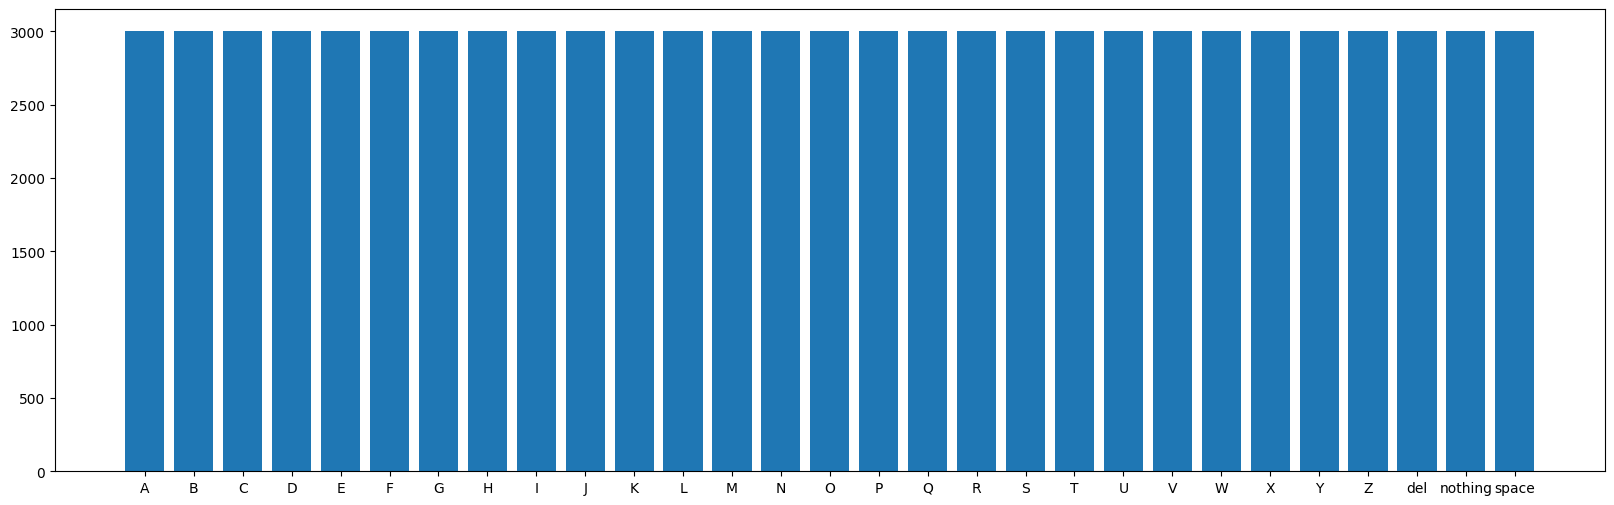

In [ ]:
classes = sorted(os.listdir(train_path))
numbers = []

for i in classes:
  numbers.append(len(os.listdir(train_path + '/' + i)))
  
plt.figure(figsize = (20,6))
plt.bar(classes, numbers)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

A


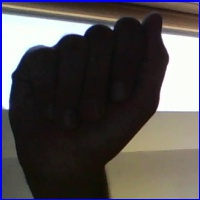

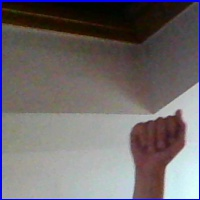

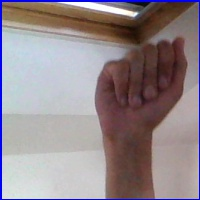

There are 3000 images in A class.

B


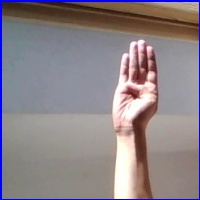

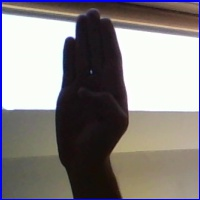

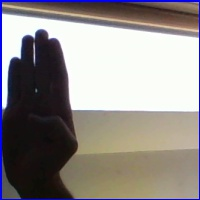

There are 3000 images in B class.

C


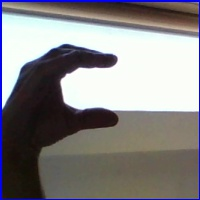

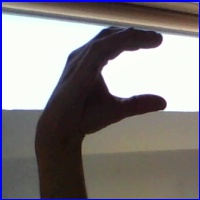

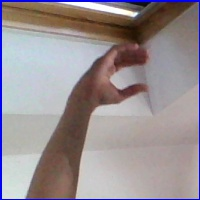

There are 3000 images in C class.

D


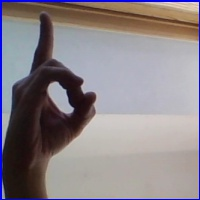

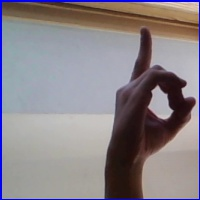

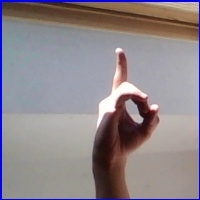

There are 3000 images in D class.

E


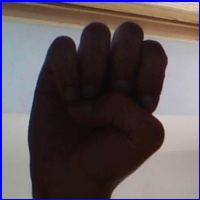

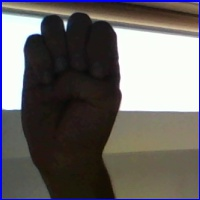

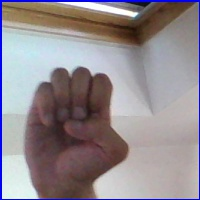

There are 3000 images in E class.

F


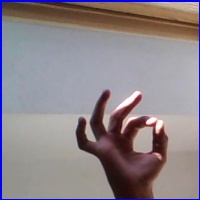

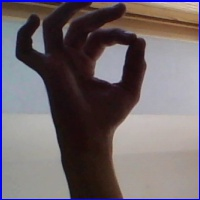

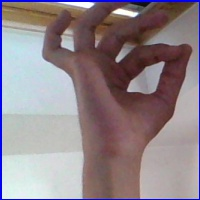

There are 3000 images in F class.

G


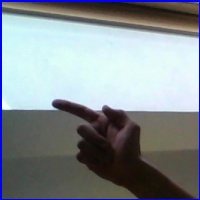

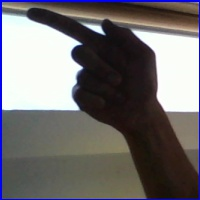

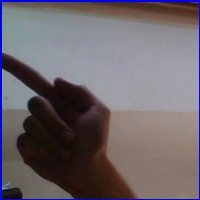

There are 3000 images in G class.

H


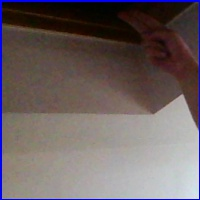

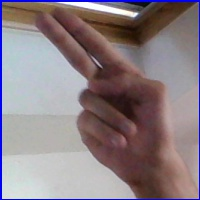

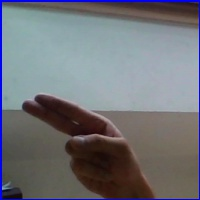

There are 3000 images in H class.

I


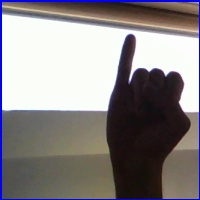

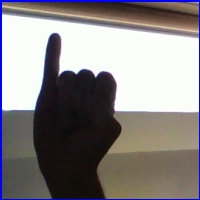

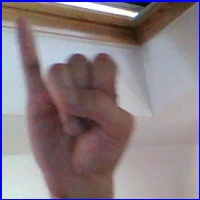

There are 3000 images in I class.

J


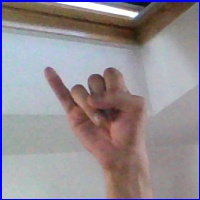

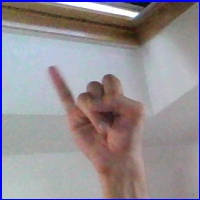

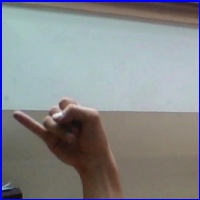

There are 3000 images in J class.

K


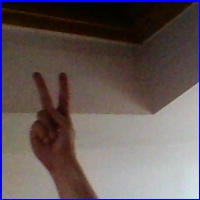

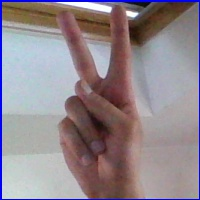

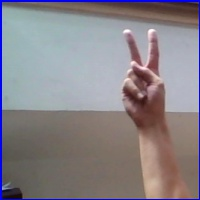

There are 3000 images in K class.

L


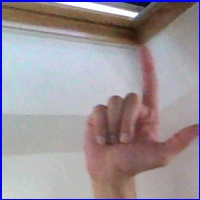

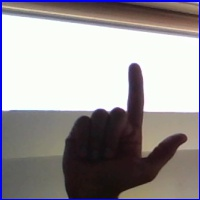

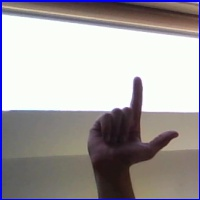

There are 3000 images in L class.

M


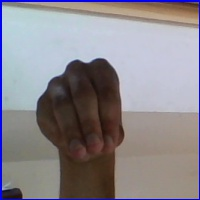

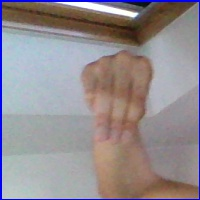

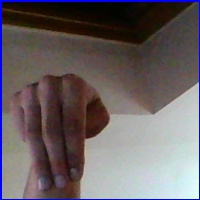

There are 3000 images in M class.

N


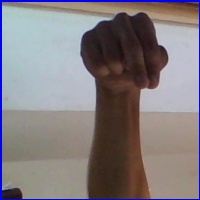

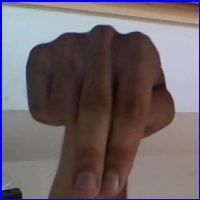

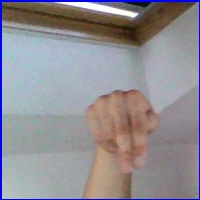

There are 3000 images in N class.

O


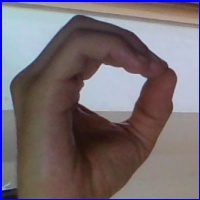

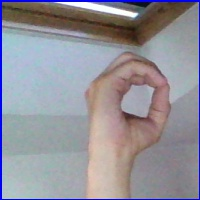

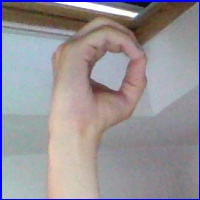

There are 3000 images in O class.

P


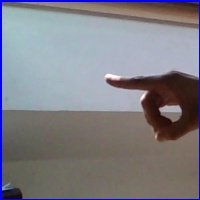

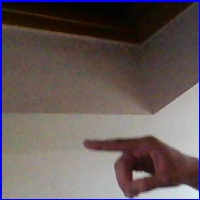

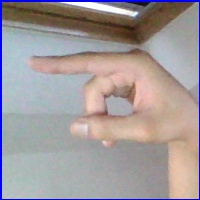

There are 3000 images in P class.

Q


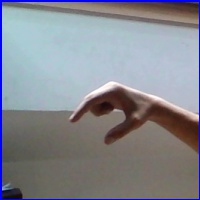

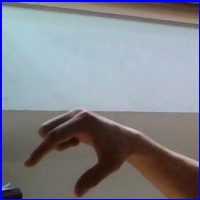

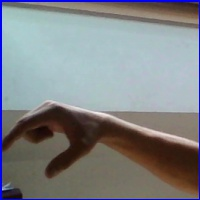

There are 3000 images in Q class.

R


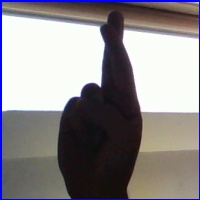

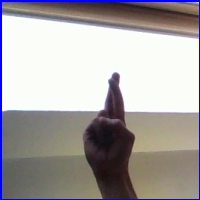

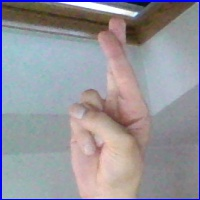

There are 3000 images in R class.

S


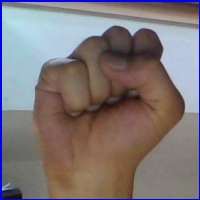

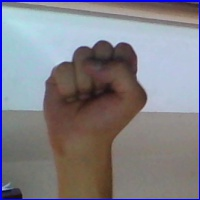

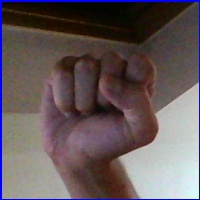

There are 3000 images in S class.

T


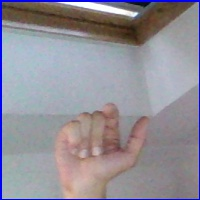

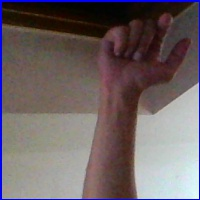

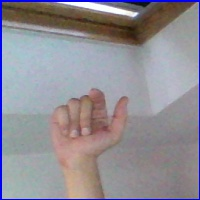

There are 3000 images in T class.

U


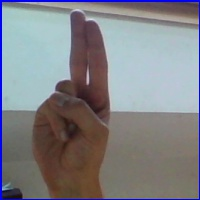

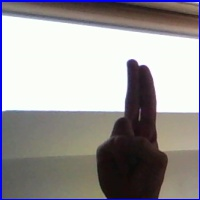

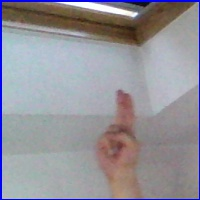

There are 3000 images in U class.

V


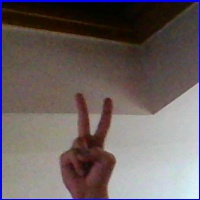

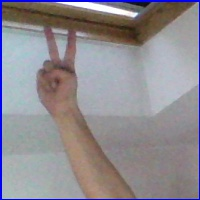

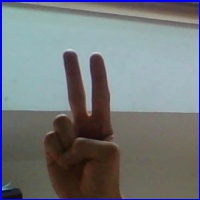

There are 3000 images in V class.

W


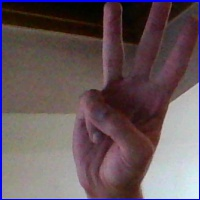

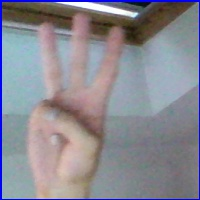

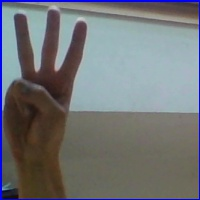

There are 3000 images in W class.

X


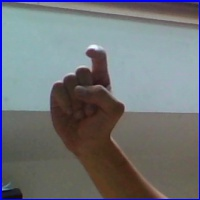

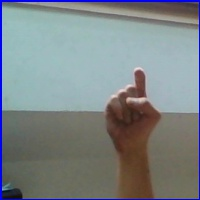

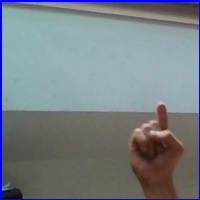

There are 3000 images in X class.

Y


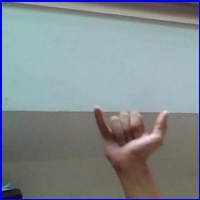

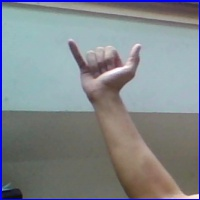

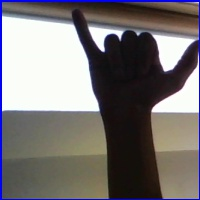

There are 3000 images in Y class.

Z


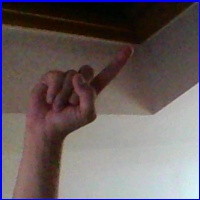

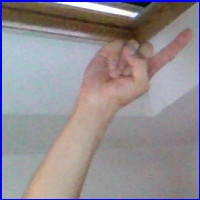

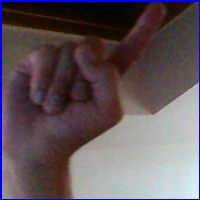

There are 3000 images in Z class.

del


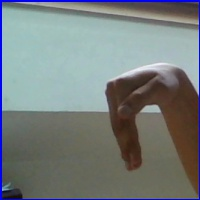

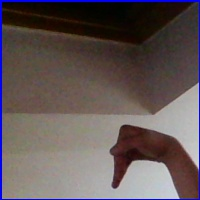

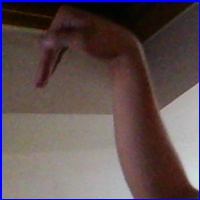

There are 3000 images in del class.

nothing


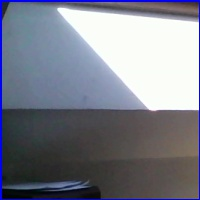

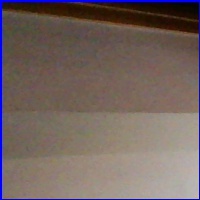

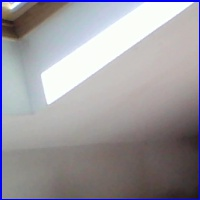

There are 3000 images in nothing class.

space


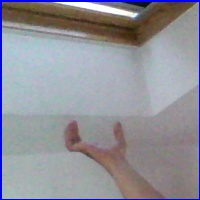

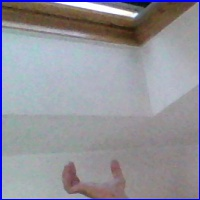

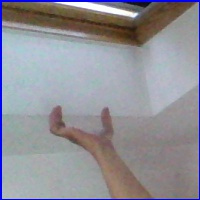

There are 3000 images in space class.


In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

for i in labels:
  path = train_path + '/' + i
  folder_data = os.listdir(path)
  k = 0
  print("")
  print(i)
  for image_path in folder_data:
    if k < 3:
      display(Image(path + '/' + image_path))
    k += 1
  print('There are', k, 'images in', i, 'class.')

In [ ]:
def obtain_data(data_dir):
  images = []
  labels = []
  dir_list = sorted(os.listdir(data_dir))
  for i in range(len(dir_list)):
    print('Obtaining', dir_list[i], 'images.')
    for image in os.listdir(data_dir + '/' + dir_list[i]):
      img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
      img = cv2.resize(img, (32, 32))
      images.append(img)
      labels.append(i)
  return images, labels

x, y = obtain_data(train_path)

Obtaining A images.
Obtaining B images.
Obtaining C images.
Obtaining D images.
Obtaining E images.
Obtaining F images.
Obtaining G images.
Obtaining H images.
Obtaining I images.
Obtaining J images.
Obtaining K images.
Obtaining L images.
Obtaining M images.
Obtaining N images.
Obtaining O images.
Obtaining P images.
Obtaining Q images.
Obtaining R images.
Obtaining S images.
Obtaining T images.
Obtaining U images.
Obtaining V images.
Obtaining W images.
Obtaining X images.
Obtaining Y images.
Obtaining Z images.
Obtaining del images.
Obtaining nothing images.
Obtaining space images.


In [ ]:
def preprocess_data(x, y):
  np_x = np.array(x)
  normalised_x = np_x.astype('float32') / 255
  label_encoded_y = utils.to_categorical(y)
  x_train, x_valtest, y_train, y_valtest = train_test_split(normalised_x, label_encoded_y, train_size = 0.8)
  x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5)
  return x_train, x_val, x_test, y_train, y_val, y_test

x_train, x_val, x_test, y_train, y_val, y_test = preprocess_data(x, y)

In [ ]:
print("Training data:", x_train.shape)
print("Validation data:", x_val.shape)
print("Test data:", x_test.shape)

Training data: (69600, 32, 32, 3)
Validation data: (8700, 32, 32, 3)
Test data: (8700, 32, 32, 3)


In [ ]:
resnet50_model = tf.keras.applications.ResNet50(input_shape = (32,32,3), include_top = False, weights = 'imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
for layer in resnet50_model.layers:
  layer.trainable = False

In [ ]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
model = tf.keras.Sequential([
  resnet50_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1000, activation = 'relu'),
  tf.keras.layers.Dense(29, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              2049000   
                                                                 
 dense_1 (Dense)             (None, 29)                29029     
                                                                 
Total params: 25,665,741
Trainable params: 2,078,029
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
base_learning_rate = 0.0001

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
2175/2175 [==============================] - 427s 194ms/step - loss: 3.0176 - accuracy: 0.1506 - val_loss: 2.7696 - val_accuracy: 0.2072
Epoch 2/10
2175/2175 [==============================] - 436s 201ms/step - loss: 2.6368 - accuracy: 0.2470 - val_loss: 2.5670 - val_accuracy: 0.2557
Epoch 3/10
2175/2175 [==============================] - 427s 196ms/step - loss: 2.4172 - accuracy: 0.3052 - val_loss: 2.3268 - val_accuracy: 0.3232
Epoch 4/10
2175/2175 [==============================] - 425s 195ms/step - loss: 2.2548 - accuracy: 0.3485 - val_loss: 2.1639 - val_accuracy: 0.3792
Epoch 5/10
2175/2175 [==============================] - 423s 194ms/step - loss: 2.1259 - accuracy: 0.3850 - val_loss: 2.1163 - val_accuracy: 0.3702
Epoch 6/10
2175/2175 [==============================] - 417s 192ms/step - loss: 2.0238 - accuracy: 0.4088 - val_loss: 1.9897 - val_accuracy: 0.4156
Epoch 7/10
2175/2175 [==============================] - 424s 195ms/step - loss: 1.9383 - accuracy: 0.4311 - val_

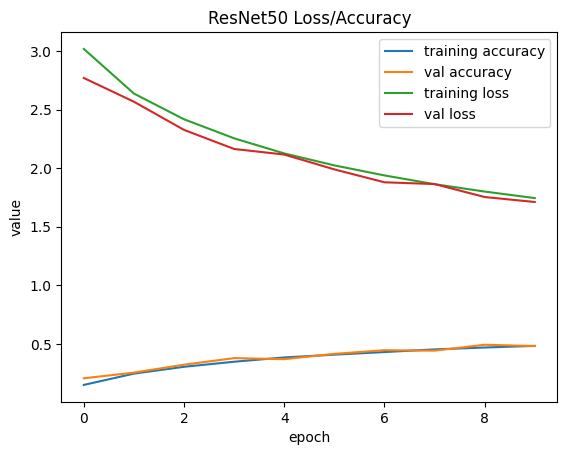

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('ResNet50 Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 41s 152ms/step - loss: 1.7218 - accuracy: 0.4824
Test Accuracy: 0.48241379857063293
Test Loss: 1.721847414970398


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

272/272 [==============================] - 43s 153ms/step


array([ 6, 17, 26, ...,  7, 13, 19])

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

array([ 6, 17, 26, ...,  9, 25, 19])

In [ ]:
print('The accuracy obtained on the test set using ResNet50 is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using ResNet50 is: 0.4824137931034483


In [ ]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       301
           1       0.61      0.55      0.58       316
           2       0.78      0.77      0.78       287
           3       0.72      0.67      0.70       304
           4       0.61      0.28      0.38       284
           5       0.87      0.56      0.68       293
           6       0.65      0.46      0.54       291
           7       0.68      0.67      0.67       307
           8       0.36      0.73      0.48       313
           9       0.47      0.74      0.58       307
          10       0.57      0.44      0.49       288
          11       0.49      0.73      0.59       294
          12       0.73      0.14      0.24       299
          13       0.42      0.43      0.42       295
          14       0.57      0.40      0.47       306
          15       0.59      0.66      0.62       347
          16       0.55      0.48      0.51       289
          17       0.50    

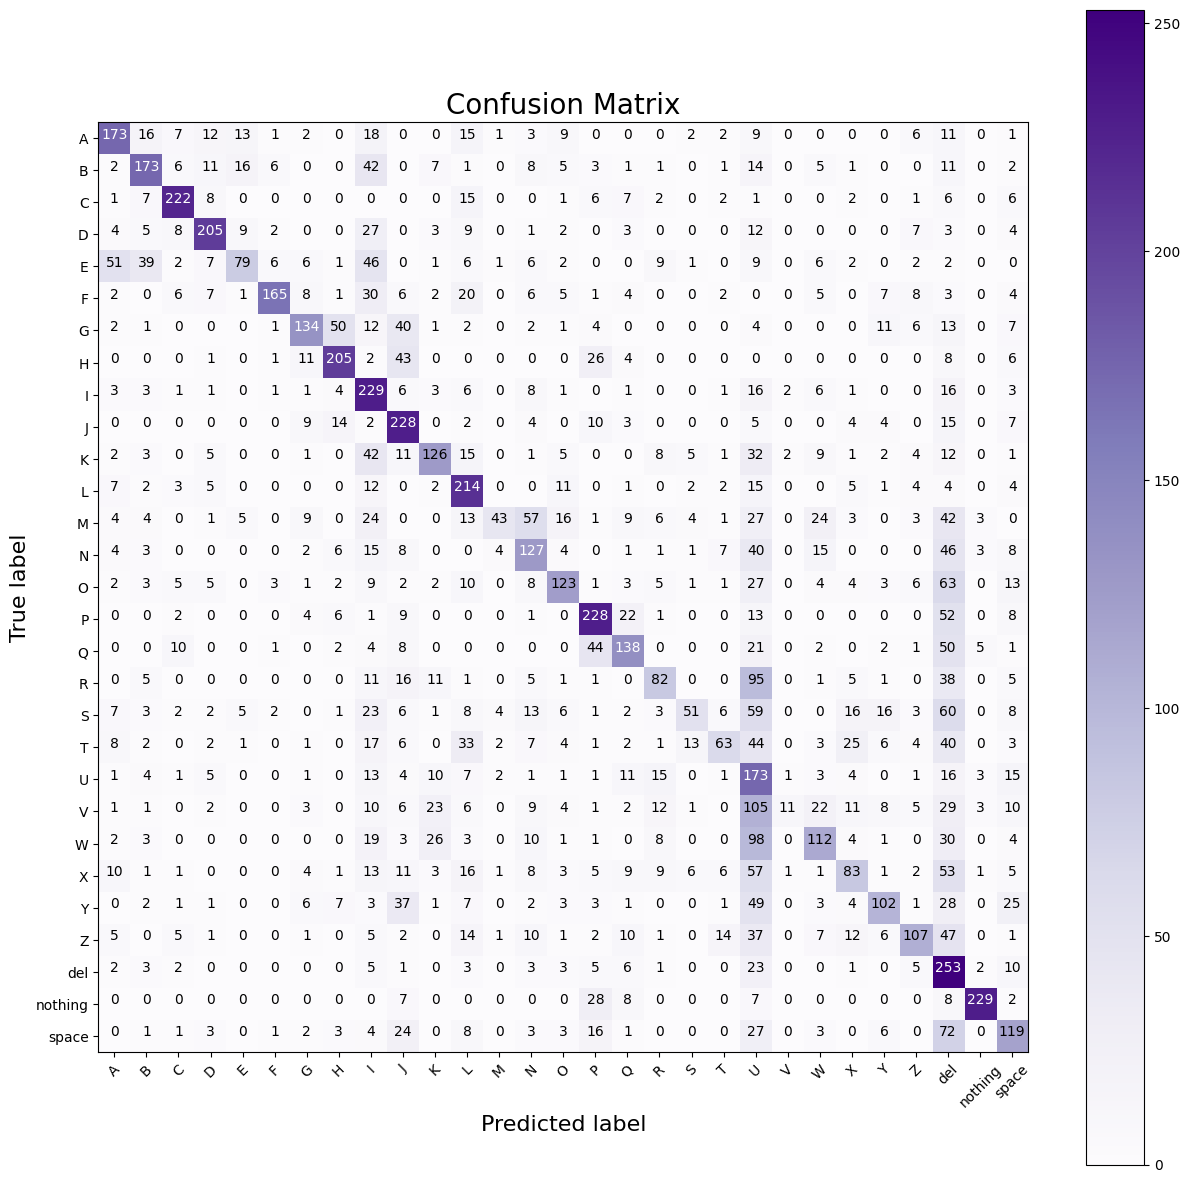

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

In [ ]:
print("Number of layers in the base model:", len(resnet50_model.layers))

Number of layers in the base model: 175


In [ ]:
for layer in resnet50_model.layers:
        layer.trainable = True

In [ ]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              2049000   
                                                                 
 dense_1 (Dense)             (None, 29)                29029     
                                                                 
Total params: 25,665,741
Trainable params: 25,612,621
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate/10), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historyft = model.fit(x_train, y_train, epochs = 20, initial_epoch = history.epoch[-1], validation_data = (x_val, y_val))

Epoch 10/20
2175/2175 [==============================] - 5578s 3s/step - loss: 5.3703 - accuracy: 0.3072 - val_loss: 1.3367 - val_accuracy: 0.6205
Epoch 11/20
2175/2175 [==============================] - 5576s 3s/step - loss: 1.1891 - accuracy: 0.6423 - val_loss: 0.5195 - val_accuracy: 0.8487
Epoch 12/20
2175/2175 [==============================] - 5531s 3s/step - loss: 0.6032 - accuracy: 0.8118 - val_loss: 0.2211 - val_accuracy: 0.9302
Epoch 13/20
2175/2175 [==============================] - 5578s 3s/step - loss: 0.3226 - accuracy: 0.8969 - val_loss: 0.0950 - val_accuracy: 0.9709
Epoch 14/20
2175/2175 [==============================] - 5547s 3s/step - loss: 0.1819 - accuracy: 0.9418 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 15/20
2175/2175 [==============================] - 5583s 3s/step - loss: 0.1114 - accuracy: 0.9645 - val_loss: 0.0251 - val_accuracy: 0.9920
Epoch 16/20
2175/2175 [==============================] - 5589s 3s/step - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0

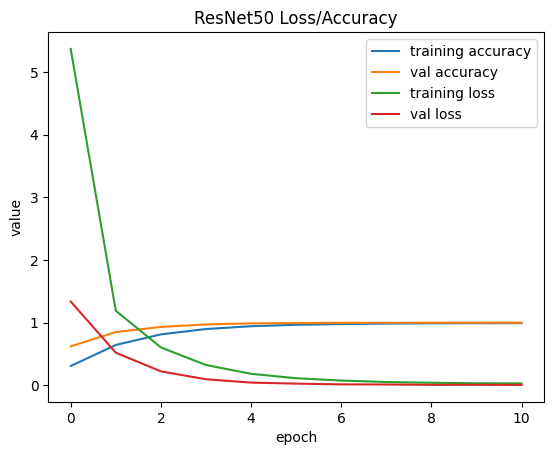

In [ ]:
plt.figure()
plt.plot(historyft.history['accuracy'], label='training accuracy')
plt.plot(historyft.history['val_accuracy'], label='val accuracy')
plt.plot(historyft.history['loss'], label='training loss')
plt.plot(historyft.history['val_loss'], label='val loss')
plt.title('ResNet50 Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 41s 151ms/step - loss: 0.0067 - accuracy: 0.9984
Test Accuracy: 0.998390793800354
Test Loss: 0.006729306653141975


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

In [ ]:
print('The accuracy obtained on the test set using ResNet50 is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using ResNet50 is: 0.9983908045977011


In [ ]:
print(classification_report(y_testing, y_pred))

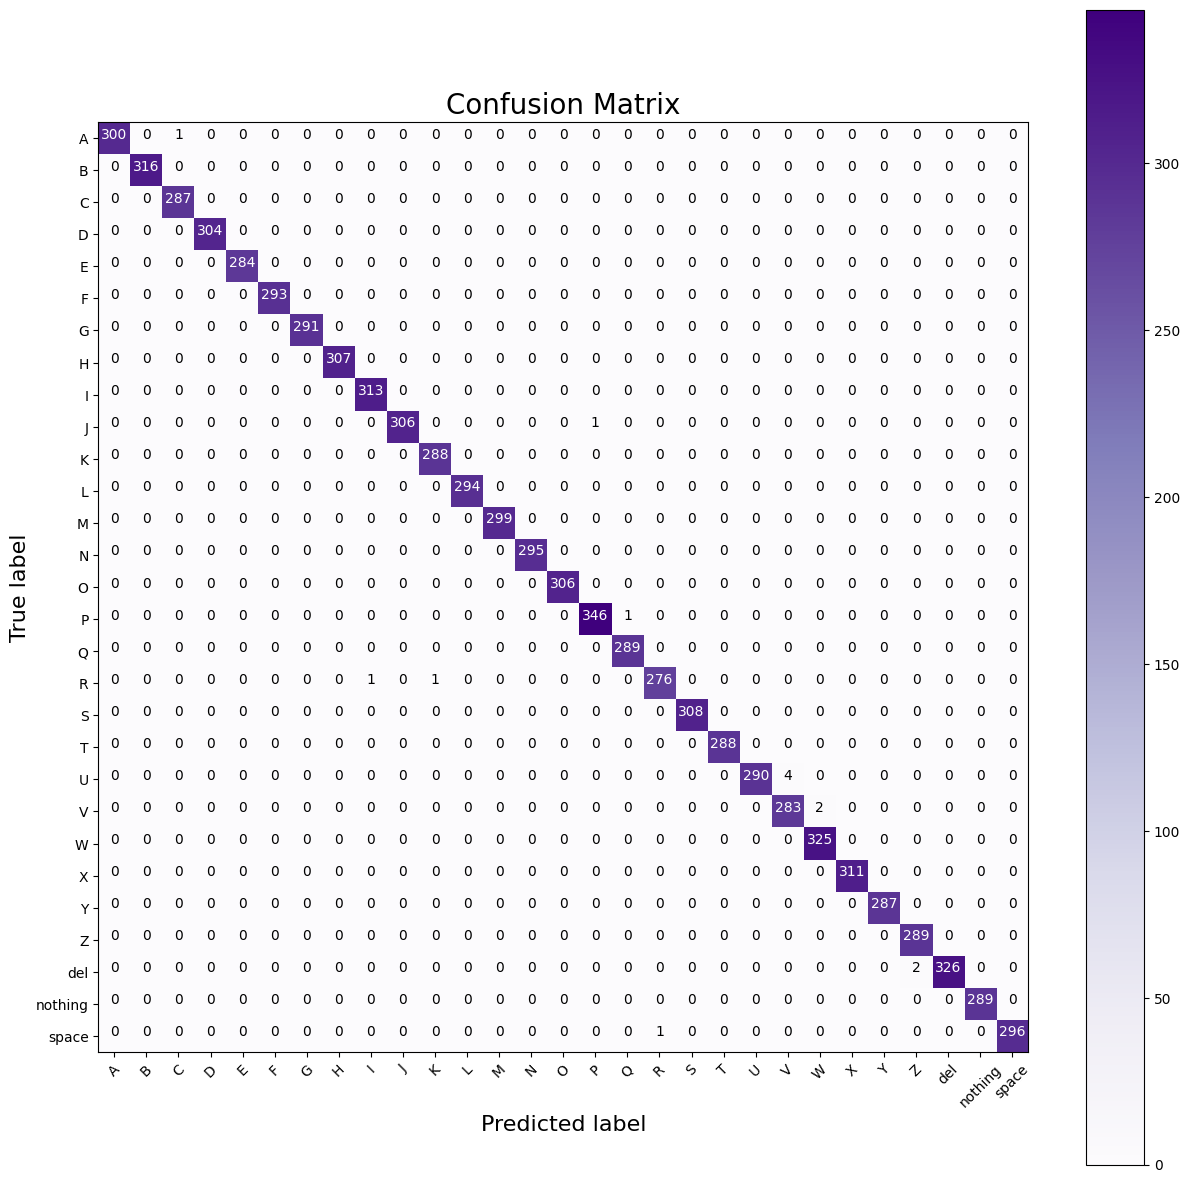

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

1/1 [==============================] - 0s 48ms/step
Prediction of image is: C



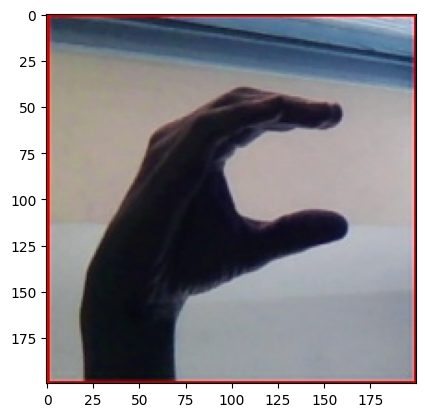

1/1 [==============================] - 0s 48ms/step
Prediction of image is: C



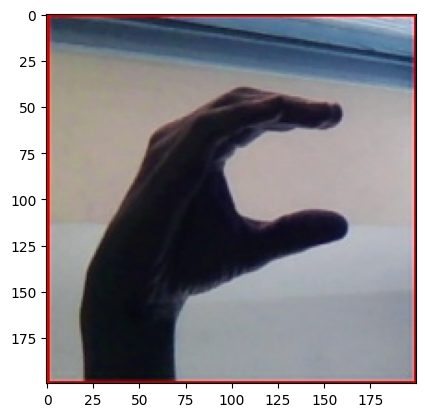

In [ ]:
testimage = []
img = cv2.imread('/content/asl_alphabet_test/asl_alphabet_test/C_test.jpg')
plt.imshow(img)
img = cv2.resize(img, (32, 32))
testimage.append(img)
np_x = np.array(testimage)
imge = np_x.astype('float32') / 255
predict = np.argmax(model.predict(imge), axis = -1)

if predict[0] == 0:
  prediction = 'A'
elif predict[0] == 1:
  prediction = 'B'
elif predict[0] == 2:
  prediction = 'C'
elif predict[0] == 3:
  prediction = 'D'
elif predict[0] == 4:
  prediction = 'E'
elif predict[0] == 5:
  prediction = 'F'
elif predict[0] == 6:
  prediction = 'G'
elif predict[0] == 7:
  prediction = 'H'
elif predict[0] == 8:
  prediction = 'I'
elif predict[0] == 9:
  prediction = 'J'
elif predict[0] == 10:
  prediction = 'K'
elif predict[0] == 11:
  prediction = 'L'
elif predict[0] == 12:
  prediction = 'M'
elif predict[0] == 13:
  prediction = 'N'
elif predict[0] == 14:
  prediction = 'O'
elif predict[0] == 15:
  prediction = 'P'
elif predict[0] == 16:
  prediction = 'Q'
elif predict[0] == 17:
  prediction = 'R'
elif predict[0] == 18:
  prediction = 'S'
elif predict[0] == 19:
  prediction = 'T'
elif predict[0] == 20:
  prediction = 'U'
elif predict[0] == 21:
  prediction = 'V'
elif predict[0] == 22:
  prediction = 'W'
elif predict[0] == 23:
  prediction = 'X'
elif predict[0] == 24:
  prediction = 'Y'
elif predict[0] == 25:
  prediction = 'Z'
elif predict[0] == 26:
  prediction = 'del'
elif predict[0] == 27:
  prediction = 'nothing'
elif predict[0] == 28:
  prediction = 'space'
else:
  prediction = 'invalid'
    
print('Prediction of image is:', prediction)
print('')